In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN/003.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2007-01-02,127.0,133.00,127.00,132.00,76.526367,420128,0.0,0.0
1,2007-01-03,131.5,133.00,127.25,127.25,73.772598,517141,0.0,0.0
2,2007-01-04,125.0,127.00,121.75,122.25,70.873871,679753,0.0,0.0
3,2007-01-05,118.0,121.25,115.00,120.50,69.859299,1503804,0.0,0.0
4,2007-01-08,121.5,124.50,121.50,123.75,71.743469,547970,0.0,0.0


In [7]:
df = df.sort_values("Date").reset_index(drop=True)

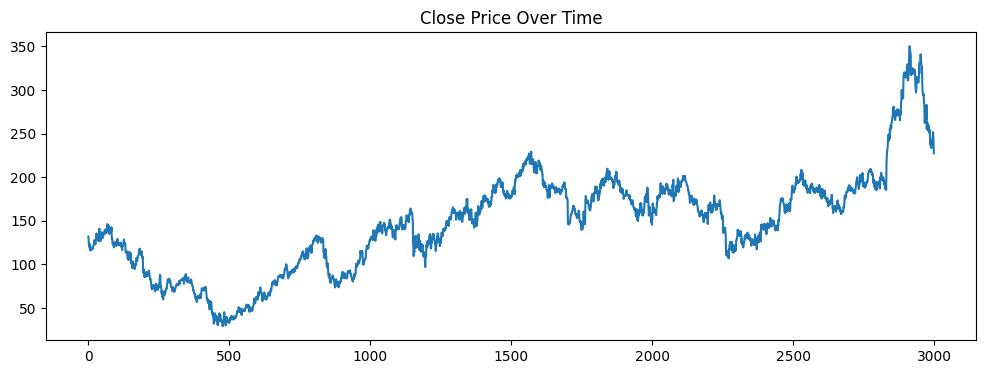

In [8]:
plt.figure(figsize=(12,4))
plt.plot(df["Close"])
plt.title("Close Price Over Time")
plt.show()

Kal ka Close ≈ Aaj ka Close 
This is cld as lag feature

In [9]:
df["lag_1"] = df["Close"].shift(1) 
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,lag_1
1,2007-01-03,131.5,133.00,127.25,127.25,73.772598,517141,0.0,0.0,132.00
2,2007-01-04,125.0,127.00,121.75,122.25,70.873871,679753,0.0,0.0,127.25
3,2007-01-05,118.0,121.25,115.00,120.50,69.859299,1503804,0.0,0.0,122.25
4,2007-01-08,121.5,124.50,121.50,123.75,71.743469,547970,0.0,0.0,120.50
5,2007-01-09,124.0,124.00,118.00,118.00,68.409958,1608223,0.0,0.0,123.75


In [10]:
split = int(len(df) * 0.8)

train = df.iloc[:split]
test  = df.iloc[split:]


In [11]:
from sklearn.linear_model import LinearRegression

X_train = train[["lag_1"]]
y_train = train["Close"]

X_test  = test[["lag_1"]]
y_test  = test["Close"]

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

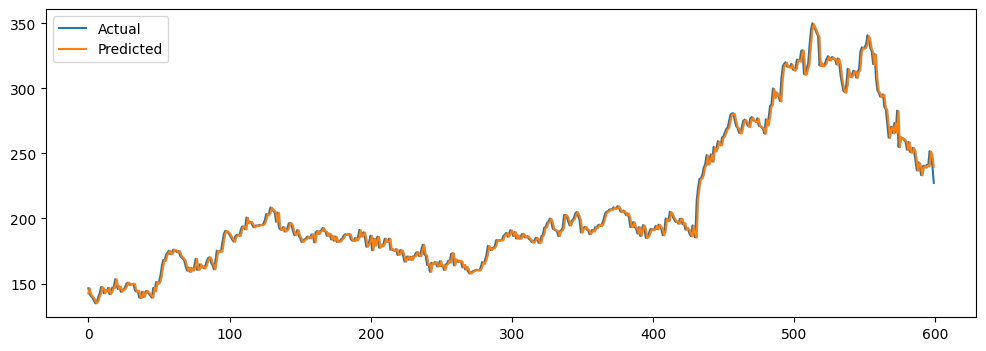

In [12]:
pred = model.predict(X_test)

plt.figure(figsize=(12,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.show()


In [13]:
import os

DATA_PATH = "/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN"
print(os.listdir(DATA_PATH))


['070.csv', '645.csv', '577.csv', '169.csv', '914.csv', '592.csv', '702.csv', '875.csv', '274.csv', '528.csv', '003.csv', '552.csv', '484.csv', '640.csv', '416.csv', '088.csv', '143.csv', '405.csv', '558.csv', '390.csv', '228.csv', '495.csv', '355.csv', '614.csv', '445.csv', '319.csv', '230.csv', '213.csv', '234.csv', '958.csv', '436.csv', '135.csv', '168.csv', '791.csv', '546.csv', '376.csv', '374.csv', '367.csv', '653.csv', '433.csv', '226.csv', '859.csv', '559.csv', '473.csv', '542.csv', '387.csv', '662.csv', '064.csv', '665.csv', '804.csv']


In [14]:

submission_rows = []

for file in os.listdir(DATA_PATH):
    if not file.endswith(".csv"):
        continue
        
    stock_name = file.replace(".csv", "")
    df = pd.read_csv(os.path.join(DATA_PATH, file))
    df = df.sort_values("Date")
    
    last_close = df["Close"].iloc[-1]
    
    for day in range(1, 101):
        submission_rows.append({
            "ID": f"{stock_name}_{day}",
            "Close": last_close
        })

submission = pd.DataFrame(submission_rows)
submission.head()


,ID,Close
0,070_#1,104.230003
1,070_#2,104.230003
2,070_#3,104.230003
3,070_#4,104.230003
4,070_#5,104.230003


In [15]:
df = pd.read_csv(os.path.join(DATA_PATH, file))
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [16]:
submission.head(10)


,ID,Close
0,070_#1,104.230003
1,070_#2,104.230003
2,070_#3,104.230003
3,070_#4,104.230003
4,070_#5,104.230003
5,070_#6,104.230003
6,070_#7,104.230003
7,070_#8,104.230003
8,070_#9,104.230003
9,070_#10,104.230003


In [17]:
submission.to_csv("submission.csv", index=False)


In [18]:
import pandas as pd

sub = pd.read_csv("/kaggle/working/submission.csv")
sub.head()

# sub.shape


,ID,Close
0,070_#1,104.230003
1,070_#2,104.230003
2,070_#3,104.230003
3,070_#4,104.230003
4,070_#5,104.230003


# Arima

In [19]:
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from prophet import Prophet

from statsmodels.tsa.arima.model import ARIMA

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
import tensorflow as tf

from scipy import stats

In [20]:

csv_files = ['003.csv', '064.csv', '070.csv', '088.csv', '135.csv', '143.csv', '168.csv', '169.csv', '213.csv', '226.csv', '228.csv', '230.csv', '234.csv', '274.csv', '319.csv', '355.csv', '367.csv', '374.csv', '376.csv', '387.csv', '390.csv', '405.csv', '416.csv', '433.csv', '436.csv', '445.csv', '473.csv', '484.csv', '495.csv', '528.csv', '542.csv', '546.csv', '552.csv', '558.csv', '559.csv', '577.csv', '592.csv', '614.csv', '640.csv', '645.csv', '653.csv', '662.csv', '665.csv', '702.csv', '791.csv', '804.csv', '859.csv', '875.csv', '914.csv','958.csv']

In [21]:
import datetime

def get_next_100_dates_excluding_weekends(start_date, exclude_weekends=True):

  dates = []
  current_date = start_date
  while(len(dates)!=100):
    current_date += datetime.timedelta(days=1)
    if exclude_weekends and current_date.weekday() in [5, 6]:
      continue
    dates.append(current_date)
  return dates

In [23]:
def Moving_Avg(df):
    ma_100_days = df['Close'].rolling(100).mean()
    plt.plot(df['Close'],c='r')
    plt.plot(ma_100_days,c='b')
    plt.show()

In [24]:
def grid_search_arima(data, p_range, d_range, q_range):
    stock_prices = data
    time_series = pd.Series(stock_prices)
    train_data = time_series[1:len(time_series)-200]
    test_data = time_series[len(time_series)-200:]
    
    p_values = [0,1,2,3,5,7]
    d_values = range(0, 3)
    q_values = range(0, 3)
    min_error = 1000000000
    best = ()
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                warnings.filterwarnings("ignore")
                model = ARIMA(train_data, order=order).fit()
                predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
                error = mean_squared_error(test_data, predictions)

                if(error<min_error) :
                    min_error = error
                    best = order

    return best

In [25]:
def predictor_arima(path):
    df = pd.read_csv(path)

    df.dropna(inplace=True)
    # df = fix_outliers_iqr(df)  // Best reslts were got when we didn't fix the outliers
    boxcox = PowerTransformer(method="box-cox")

    xtrain = boxcox.fit_transform(np.array(df['Close']).reshape(-1,1))

    model = ARIMA(xtrain,order=(7,1,1))

    model_fit = model.fit()

    next_100 = model_fit.forecast(100)

    ids=[]
    for i in range(1,101):
        ID = f"{os.path.splitext(os.path.basename(path))[0]}_#{i}"
        ids.append(ID)

    y_pred = list(boxcox.inverse_transform(np.array(next_100).reshape(-1,1)))
    pred_df=pd.DataFrame({'ID':ids,'Price':[i[0] for i in y_pred]})

    return pred_df

In [26]:
def write_to_csv(dfs):
    updated_df = pd.concat(dfs)
    updated_df.to_csv('submit.csv', index=False)

In [27]:
dfs = []
for csv in csv_files:

    pred = predictor_arima(f'/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN/{csv}')
    # pred = predictor_prophet(f'/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN/{csv}')
    # pred = predictor_LSTM(f'/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN/{csv}')
    data = pd.DataFrame({'ID': pred['ID'], 'Price':[i for i in pred['Price']]})
    dfs.append(data)
write_to_csv(dfs)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Auto - Arima Implementation

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 12.4 MB/s eta 0:00:00a 0:00:01


In [11]:
import pandas as pd
import numpy as np
import os

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


In [12]:
import os

DATA_PATH = "/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN"
print(os.listdir(DATA_PATH))


['070.csv', '645.csv', '577.csv', '169.csv', '914.csv', '592.csv', '702.csv', '875.csv', '274.csv', '528.csv', '003.csv', '552.csv', '484.csv', '640.csv', '416.csv', '088.csv', '143.csv', '405.csv', '558.csv', '390.csv', '228.csv', '495.csv', '355.csv', '614.csv', '445.csv', '319.csv', '230.csv', '213.csv', '234.csv', '958.csv', '436.csv', '135.csv', '168.csv', '791.csv', '546.csv', '376.csv', '374.csv', '367.csv', '653.csv', '433.csv', '226.csv', '859.csv', '559.csv', '473.csv', '542.csv', '387.csv', '662.csv', '064.csv', '665.csv', '804.csv']


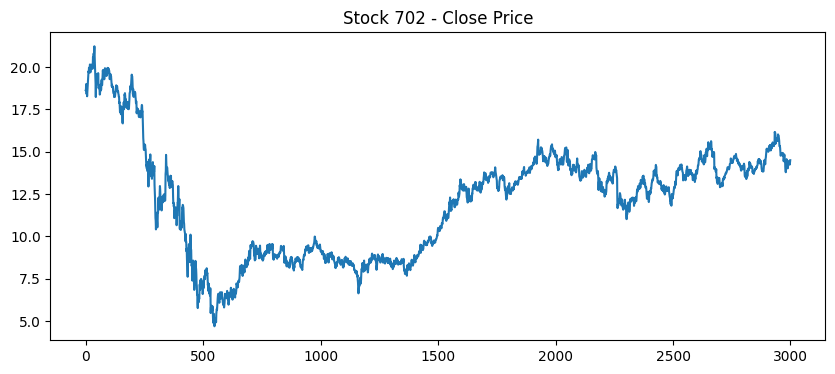

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/kaggle/input/mine-the-model-2023/Upload-Dataset/TRAIN"

df = pd.read_csv(os.path.join(DATA_PATH, "702.csv"))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

close = df['Close']

plt.figure(figsize=(10,4))
plt.plot(close)
plt.title("Stock 702 - Close Price")
plt.show()

In [14]:
from pmdarima import auto_arima

model = auto_arima(
    close,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,              # automatically find differencing
    seasonal=False,      # stocks are non-seasonal
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1214.505, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1213.171, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1213.221, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.359, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1210.509, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.045 seconds


In [15]:
forecast = model.predict(n_periods=100)

In [26]:
import os
import pandas as pd
from pmdarima import auto_arima

submission_rows = []

for file in os.listdir(DATA_PATH):
    if not file.endswith(".csv"):
        continue

    stock_name = file.replace(".csv", "")
    df = pd.read_csv(os.path.join(DATA_PATH, file))
    df = df.sort_values("Date")

    close = df["Close"]

    model = auto_arima(
        close,
        seasonal=False,
        suppress_warnings=True,
        stepwise=True
    )

    forecast = model.predict(n_periods=100)

    for day in range(1, 101):
        submission_rows.append({
            "ID": f"{stock_name}_#{day}",
            "Close": forecast.iloc[day-1]
        })

submission = pd.DataFrame(submission_rows)
submission.to_csv("submission.csv", index=False)


KeyboardInterrupt: 

In [24]:
submission.columns

Index(['ID', 'Close'], dtype='object')

In [25]:
submission.head(10)

,ID,Close
0,070_#1,104.004658
1,070_#2,104.061122
2,070_#3,104.286336
3,070_#4,104.372925
4,070_#5,104.205381
5,070_#6,104.176717
6,070_#7,104.361134
7,070_#8,104.495609
8,070_#9,104.393253
9,070_#10,104.317603
